# 真實資料

資料集連結:<br>
Heart Failure Prediction<br>
https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

統計比例

In [2]:
import pandas as pd

# 读取 CSV 文件
data = pd.read_csv('/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv')

# 统计 0 和 1 的数量
counts = data['DEATH_EVENT'].value_counts()

# 打印结果
print(counts)

0    203
1     96
Name: DEATH_EVENT, dtype: int64


##類神經網路

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


準確率： 0.8166666666666667
分類報告：
               precision    recall  f1-score   support

           0       0.80      0.91      0.85        35
           1       0.85      0.68      0.76        25

    accuracy                           0.82        60
   macro avg       0.82      0.80      0.80        60
weighted avg       0.82      0.82      0.81        60

混淆矩陣：
 [[32  3]
 [ 8 17]]


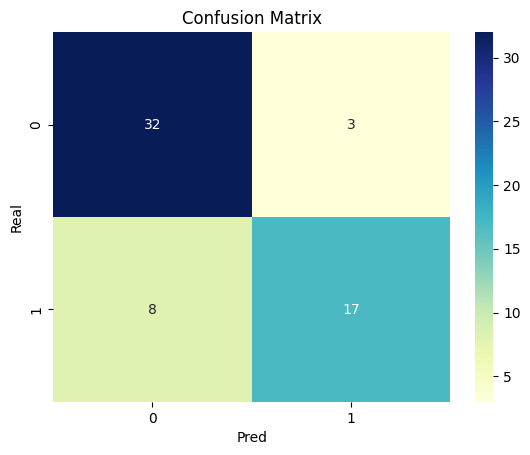

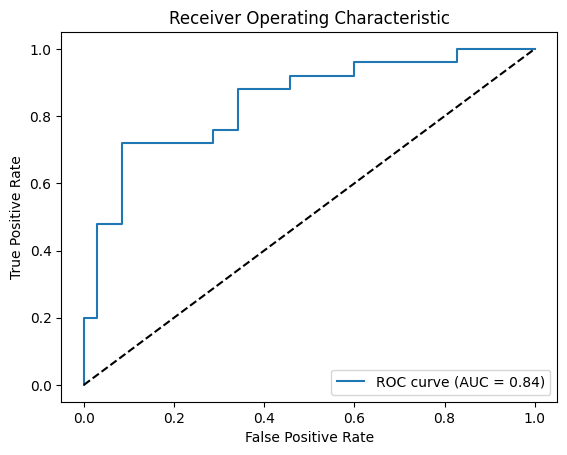

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neural_network import MLPClassifier

# 讀取資料集
data = pd.read_csv('/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv')

# 切分特徵和目標變數
# selected_features = ['time', 'serum_creatinine', 'ejection_fraction', 'age', 'creatinine_phosphokinase', 'platelets', 'serum_sodium']
# X = data[selected_features]
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# 資料打亂
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 進行數據降採樣
undersampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# MinMax正规化
scaler = MinMaxScaler()
X_train_undersampled = scaler.fit_transform(X_train_undersampled)
X_test = scaler.transform(X_test)

# 建立類神經網路模型
nn_model = MLPClassifier(hidden_layer_sizes=(256, 128, 64), activation='logistic', learning_rate_init=0.001, alpha=0.001, random_state=42)
nn_model.fit(X_train_undersampled, y_train_undersampled)

# 預測測試資料
y_pred = nn_model.predict(X_test)
y_pred_scores = nn_model.predict_proba(X_test)[:, 1]  # 使用 predict_proba 取得概率分數

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_scores)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_scores)

# 印出結果
print("準確率：", accuracy)
print("分類報告：\n", classification_report)
print("混淆矩陣：\n", confusion_mat)

# 可視化混淆矩陣
sns.heatmap(confusion_mat, annot=True, cmap="YlGnBu")
plt.xlabel('Pred')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

# 繪製 ROC 曲線
fpr, tpr, thresholds = roc_curve(y_test, y_pred_scores)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # 對角線
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()